0.9379406648429645
Naive Bayes  Accuracy : 
 93.79406648429645 %

Input your tweet : 
iam very sad how ever iam very happy

*****************
Neutral,which means the person have to either sad or happy mood
*****************


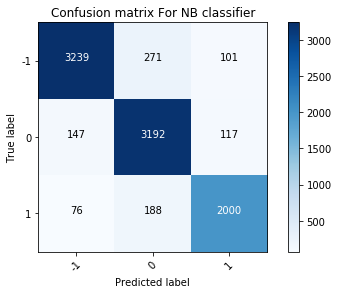

In [3]:
import json
import pandas as pd
#import time
import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
#from sklearn.metrics import roc_auc_score

tweets_data = []
x = []
y = []

#Word Counts with CountVectorizer. 
#The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words,
#but also to encode new documents using that vocabulary.
#You can use it as follows: Create an instance of the CountVectorizer class
vectorizer = CountVectorizer(stop_words='english')
# remove English stop words
#print(vectorizer)

def retrieveTweet(data_path):

    tweets_data_path = data_path
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')          

             
def retrieveProcessedData(Pdata_path):
    sent = pd.read_excel(Pdata_path)
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
             #X CONTAIN THE ORIGINAL TWEET
            x.append(tweets_data[i]['text'])
            y.append(sent['sentiment'][i])
           # print(y)
            #print(x)
            
            

def nbTrain():
    from sklearn.naive_bayes import MultinomialNB
  #  start_timenb = time.time()
    train_features = vectorizer.fit_transform(x)
   # vectorizer.fit(x)
   # print(vectorizer)
    # examine the fitted vocabulary
   # print(train_features)
   # print("features")
    #print(vectorizer.get_feature_names())
  #  print(train_features.toarray())
    #print(pd.DataFrame(train_features.toarray(), columns=vectorizer.get_feature_names()))

    

    actual = y
    
    nb = MultinomialNB()
    nb.fit(train_features, [int(r) for r in y])
    
    # 4. transform training data into a 'document-term matrix'
    test_features = vectorizer.transform(x)
  
   #print(test_features)
   # print(test_features.toarray())
    
   # print(pd.DataFrame(test_features.toarray(), columns=vectorizer.get_feature_names()))


    predictions = nb.predict(test_features)
   # print(predictions)
  #  print(predictions.type(predictions))

    fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
   # print(fpr)
   # print(tpr)
    #print(thresholds)
    nbscore = format(metrics.auc(fpr, tpr))
    print(nbscore)
    nbscore = float(nbscore)*100
  #  print("\n")

    print("Naive Bayes  Accuracy : \n", nbscore,"%")
     
    nb_matrix = confusion_matrix(actual, predictions)
   # plt.figure()
    plot_confusion_matrix(nb_matrix, classes=[-1,0,1],title='Confusion matrix For NB classifier')



def runall():     
    retrieveTweet('datasample/tweetdata.txt')  
    retrieveProcessedData('processeddatasample/output.xlsx')
    nbTrain()
   # plot_confusion_matrix(nb_matrix,classes=[-1,0,1])

    
def naiveINPUT(inputtweet):
    from sklearn.naive_bayes import MultinomialNB
    train_features = vectorizer.fit_transform(x)
    nb = MultinomialNB()
    
    nb.fit(train_features, [int(r) for r in y])
    
    
    inputnaiveee= vectorizer.transform([inputtweet])
    predictt = nb.predict(inputnaiveee)
    
    if predictt == 1:
        predictt = "Positive"
    elif predictt == 0:
        predictt = "Neutral,which means the person have to either sad or happy mood"
    elif predictt == -1:
        predictt = "Negative"
    else:
        print("Nothing")
    
    print("\n*****************")
    print(predictt)
    print("*****************")

runall()

print("\nInput your tweet : ")
inputtweet = input()

naiveINPUT(inputtweet)
